In [1]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler, robust_scale
plt.rcParams.update({'font.size': 22})
import tool

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 以月分做分群

In [2]:
# import the dataset
dataset = tool.read_ele_csv(r'D:\JunShen\dataset\彰化_雲林用電量(專用電表_day_raw.csv')

讀取用電資料: D:\JunShen\dataset\彰化_雲林用電量(專用電表_day_raw.csv
讀取 500 筆資料之花費時間: 0.4 分鐘
讀取 1000 筆資料之花費時間: 0.79 分鐘
讀取 1500 筆資料之花費時間: 1.22 分鐘
讀取 2000 筆資料之花費時間: 1.64 分鐘
讀取 2500 筆資料之花費時間: 2.05 分鐘
讀取 3000 筆資料之花費時間: 2.46 分鐘
讀取 3500 筆資料之花費時間: 2.87 分鐘
讀取 4000 筆資料之花費時間: 3.29 分鐘
讀取 4500 筆資料之花費時間: 3.5 分鐘
Stop iteration!
串接資料花費時間: 3.5 分鐘
用電資料讀取完成!!


In [5]:
dataset.head()

,date,98666103.0,98666100.0,98666041.0,98666040.0,98666039.0,98665900.0,98662811.0,98662670.0,98662660.0,...,37224371.0,73307016.0,34244800.0,92214745.0,98187652.0,34648560.0,53296412.0,68106009.0,65012233.0,39820017.0
0,2007-01-01,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
1,2007-01-02,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
2,2007-01-03,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
3,2007-01-04,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
4,2007-01-05,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0


In [6]:
dataset.describe()

,98666103.0,98666100.0,98666041.0,98666040.0,98666039.0,98665900.0,98662811.0,98662670.0,98662660.0,98662657.0,...,37224371.0,73307016.0,34244800.0,92214745.0,98187652.0,34648560.0,53296412.0,68106009.0,65012233.0,39820017.0
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,...,4169.000000,4169.000000,4199.000000,4199.000000,4169.000000,4199.000000,4199.000000,4199.000000,4199.000000,4169.000000
mean,0.733032,0.462015,0.580376,1.239343,0.545130,14.481543,1.751369,0.320553,0.624196,2.375327,...,0.084673,2.551571,0.278876,1.484401,1.070521,2.248035,1.321148,3.501667,3.304834,0.264932
std,0.424054,0.217103,0.444356,0.978480,0.763146,9.691686,1.461396,0.176163,0.587361,0.907608,...,0.188866,1.218346,0.544716,1.335351,0.907157,2.023754,0.917243,3.819536,4.816163,0.284963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.209677,0.000000,0.000000,0.000000,0.774194,...,0.000000,0.225806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467742,0.306452,0.083333,0.533333,0.000000,9.193548,0.483871,0.193548,0.145161,1.645161,...,0.000000,1.790323,0.000000,0.658333,0.258065,0.024194,0.677419,1.185484,0.000000,0.024194
50%,0.716667,0.451613,0.645161,0.983871,0.000000,13.225806,1.532258,0.290323,0.532258,2.338710,...,0.000000,2.450000,0.000000,1.072581,0.903226,2.032258,0.975806,2.283333,0.000000,0.183333
75%,1.032258,0.633333,0.903226,1.716667,1.050000,19.983871,2.866667,0.416667,0.903226,3.112903,...,0.041667,3.350000,0.357143,1.681034,1.580645,3.709677,1.958333,4.677419,5.483871,0.395161
max,2.017857,1.048387,1.583333,4.783333,2.650000,46.050000,5.096774,0.833333,2.451613,4.133333,...,1.125000,5.857143,2.825000,6.041667,3.586207,8.916667,5.104839,20.158333,24.166667,1.283333


In [3]:
dataset.date = dataset.date.astype(np.datetime64)

In [4]:
dataset['year'] = dataset.date.dt.year
dataset['month'] = dataset.date.dt.month

In [5]:
X = dataset.groupby(['year','month']).sum().values

In [6]:
# feature Scaling

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [7]:
y = dataset.year.astype(str).str.cat(dataset.month.astype(str), join='left', sep='-').unique()

In [8]:
# import the SOM model
matrix_size = 10
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 165525 , sigma = 1.0, learning_rate = 0.5)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 500)

In [9]:
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)

In [18]:
def showEleUsage(matrix):
    data_by_month = [0 for x in range(len(y))]
    index_by_som = []
    tmp_x = dataset.groupby(['year','month']).sum().values
    for i in matrix:
        for w in i:
            index_by_som_tmp = []
            for k in w:
                index_by_som_tmp.append(np.where(y == k)[0][0])
                data_by_month[np.where(y == k)[0][0]] = tmp_x.mean(axis=1)[np.where(y == k)[0][0]]
            index_by_som.append(index_by_som_tmp)

    td_empty = np.zeros((len(y),matrix_size*matrix_size))
    plt_df = pd.DataFrame(td_empty)
    for m in range(len(index_by_som)):
        for i in index_by_som[m]:
            plt_df.iloc[i,m] = data_by_month[i]
    
    fig,ax = plt.subplots(figsize = (20,16))
    # barlist = plt.bar(y, data_by_month)
    # plt.xticks(y)
    plt.xticks(np.arange(0, len(y)+1, 5))
    plt.xlabel('date')
    plt.ylabel('ele_usage_mean')
    plt.title('ele_usage_group')
    fig.autofmt_xdate(rotation=-90)

    # 分群
    g1 = []
    g2 = []
    for i, v in enumerate(np.sort(weight_matrix.flatten())): # 小到大
        if i >= (matrix_size**2)/2:
            pos_in = 0
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            while (pos in g2):
                pos_in += 1
                pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            g2.append(pos)    
        else:
            pos_in = 0
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            while (pos in g1):
                pos_in += 1
                pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            g1.append(pos)
    
    plt.bar(y, plt_df.iloc[:,g1].sum(axis=1).values, label=str(1))
    plt.bar(y, plt_df.iloc[:,g2].sum(axis=1).values, label=str(2))

    # set color by neuron
    # colormap = plt.cm.nipy_spectral(np.linspace(0,1,matrix_size*matrix_size)) #I suggest to use nipy_spectral, Set1,Paired
    # for m in range(len(index_by_som)):
    #     plt.bar(y, plt_df.iloc[:,m].values, label=str(m))

    fig.tight_layout()
    plt.legend()
    plt.show()

    return plt_df

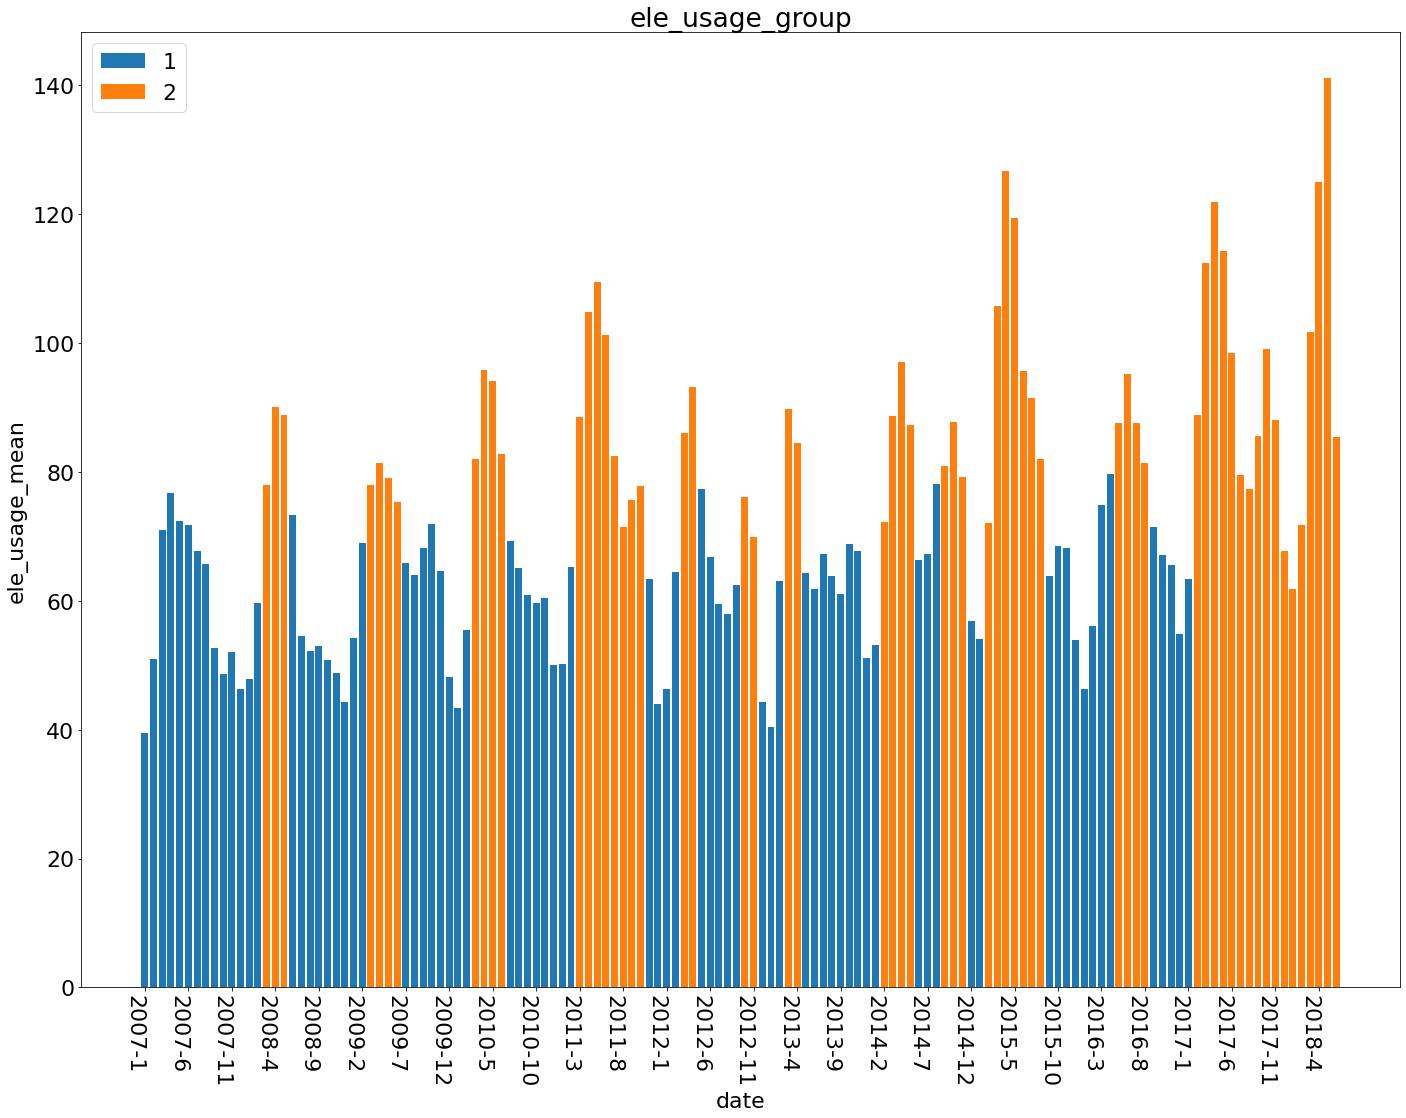

In [10]:
data_by_month = [0 for x in range(len(y))]
index_by_som = []
tmp_x = dataset.groupby(['year','month']).sum().values
for i in Matrix:
    for w in i:
        index_by_som_tmp = []
        for k in w:
            index_by_som_tmp.append(np.where(y == k)[0][0])
            data_by_month[np.where(y == k)[0][0]] = tmp_x.mean(axis=1)[np.where(y == k)[0][0]]
        index_by_som.append(index_by_som_tmp)

td_empty = np.zeros((len(y),matrix_size*matrix_size))
plt_df = pd.DataFrame(td_empty)
for m in range(len(index_by_som)):
    for i in index_by_som[m]:
        plt_df.iloc[i,m] = data_by_month[i]

fig,ax = plt.subplots(figsize = (20,16))
# barlist = plt.bar(y, data_by_month)
# plt.xticks(y)
plt.xticks(np.arange(0, len(y)+1, 5))
plt.xlabel('date')
plt.ylabel('ele_usage_mean')
plt.title('ele_usage_group')
fig.autofmt_xdate(rotation=-90)

# 分群
g1 = []
g2 = []
for i, v in enumerate(np.sort(weight_matrix.flatten())): # 小到大
    if i >= (matrix_size**2)/2:
        pos_in = 0
        pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        while (pos in g2):
            pos_in += 1
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        g2.append(pos)    
    else:
        pos_in = 0
        pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        while (pos in g1):
            pos_in += 1
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        g1.append(pos)

plt.bar(y, plt_df.iloc[:,g1].sum(axis=1).values, label=str(1))
plt.bar(y, plt_df.iloc[:,g2].sum(axis=1).values, label=str(2))

# set color by neuron
# colormap = plt.cm.nipy_spectral(np.linspace(0,1,matrix_size*matrix_size)) #I suggest to use nipy_spectral, Set1,Paired
# for m in range(len(index_by_som)):
#     plt.bar(y, plt_df.iloc[:,m].values, label=str(m))

fig.tight_layout()
plt.legend()
plt.show()

In [11]:
df_month_out = pd.DataFrame()
df_month_out['month'] = y

In [12]:
for i, v in enumerate(plt_df.iloc[:,g1].sum(axis=1).values):
    if v > 0: 
        df_month_out.loc[i,'cluster'] = 1
for i, v in enumerate(plt_df.iloc[:,g2].sum(axis=1).values):
    if v > 0: 
        df_month_out.loc[i,'cluster'] = 2

In [14]:
df_month_out.to_csv(r'D:\JunShen\dataset\dataAfterProcess\somFeature\month_cluster_by_ele.csv')

# 以地理分布做分群
- 距離
- 方向
- ele性質

In [125]:
df_out = {}

In [126]:
dataset_position = pd.read_csv(r'D:\JunShen\dataset\彰化_雲林用電量(專用電表_以處理重複電表_已前處理.csv', encoding='big5', index_col=0)
dataset_position.修正電號 = dataset_position.修正電號.astype(np.int32)

In [127]:
dataset_position.head()

,gov,WELL_NO,TOWN,LON,LAT,TWD97_X,TWD97_Y,MEASURE_EQIP,修正電號,9601,...,10612,10701,10702,10703,10704,10705,10706,volt,Unnamed: 0.1,mean
0,雲林縣政府,1.023965e+13,二崙鄉,120.424471,23.757680,191335.0,2628306.0,有(專用電表),98666103,8.5,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,22.304348
1,雲林縣政府,1.023965e+13,二崙鄉,120.424709,23.757211,191359.0,2628254.0,有(專用電表),98666100,11.5,...,20.0,20.0,20.0,27.5,27.5,20.0,20.0,NaN,NaN,14.057971
2,雲林縣政府,1.023965e+13,二崙鄉,120.427908,23.754776,191684.0,2627983.0,有(專用電表),98666041,0.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,17.659420
3,雲林縣政府,1.023965e+13,二崙鄉,120.428054,23.754984,191699.0,2628006.0,有(專用電表),98666040,31.5,...,20.0,20.0,20.0,30.5,30.5,51.5,51.5,NaN,NaN,37.710145
4,雲林縣政府,1.033965e+13,二崙鄉,120.428191,23.755048,191713.0,2628013.0,有(專用電表),98666039,0.0,...,20.0,20.0,20.0,79.5,79.5,66.0,66.0,NaN,NaN,16.586957


In [128]:
token = 'pk.eyJ1IjoidG9ueTg4MDEwOTU1IiwiYSI6ImNsNDN4MHNjdTA4dmgzbW1uOGU5bXpxb3MifQ.6v3Xll4pflqg9a90WQtX4w' # you will need your own token

In [129]:
def plot_position(df, cluster):
    fig = go.Figure()
    if cluster>0:
        for c in range(1,cluster+1):
            df_c = df.loc[df.cluster_num == c,:]
            fig.add_trace(go.Scattermapbox(lat=df_c['LAT'],
                lon=df_c['LON'],
                mode='markers+text',
                marker={'size':10},
                # textfont=dict(size=10, color='black'),
                # textposition='top right',
                name=f'cluster: {c}'))
    else:
        fig.add_trace(go.Scattermapbox(lat=df['LAT'],
                lon=df['LON'],
                mode='markers+text',
                marker={'size':10},
                text=df['修正電號'],
                textfont=dict(size=10, color='black'),
                textposition='top right',name=''))

    fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
    fig.update_layout(
    mapbox = { 
        'center': { 'lon': 120.424471, 'lat': 23.758381},
        'zoom': 8
            },
    margin = {'l':0, 'r':0, 'b':0, 't':30})

    fig.show()

In [130]:
well_x = 195891.096
well_y = 2669760.114
def selectEle(well_x,well_y,df):
    condition = np.sqrt((df["TWD97_X"]-well_x)**2 + (df["TWD97_Y"]-well_y)**2) < 5000 # 5km
    return df.loc[condition,:]

In [131]:
df_5km = selectEle(well_x,well_y,dataset_position)

In [132]:
df_5km = df_5km.reset_index(drop=True)

In [133]:
for i in range(len(df_5km)):
    df_5km.loc[i,'mean'] = df_5km.loc[i,'9601':'10706'].mean()
    df_5km.loc[i,'sum'] = df_5km.loc[i,'9601':'10706'].sum()

In [134]:
df_5km

,gov,WELL_NO,TOWN,LON,LAT,TWD97_X,TWD97_Y,MEASURE_EQIP,修正電號,9601,...,10701,10702,10703,10704,10705,10706,volt,Unnamed: 0.1,mean,sum
0,彰化縣政府,1.033751e+13,伸港鄉,120.459587,24.136309,195075.0,2670225.0,有(專用電表),37491247,5.0,...,20.0,20.0,20.00,108.00,108.0,NaN,NaN,0.0,22.700730,3110.0
1,彰化縣政府,1.033751e+13,伸港鄉,120.473739,24.132873,196512.0,2669839.0,有(專用電表),37437525,0.5,...,20.0,20.0,20.00,20.00,20.0,NaN,NaN,1.0,9.390511,1286.5
2,彰化縣政府,1.033751e+13,伸港鄉,120.475757,24.132564,196717.0,2669804.0,有(專用電表),37414298,0.0,...,20.0,20.0,20.00,20.00,20.0,NaN,NaN,2.0,10.802920,1480.0
3,彰化縣政府,1.033751e+13,伸港鄉,120.477943,24.117565,196933.0,2668142.0,有(專用電表),37350280,6.5,...,20.0,27.5,27.50,84.50,84.5,NaN,NaN,3.0,23.361314,3200.5
4,彰化縣政府,1.053751e+13,伸港鄉,120.472294,24.108616,196355.0,2667153.0,有(專用電表),37315658,0.0,...,20.0,43.5,43.50,38.50,38.5,NaN,NaN,4.0,24.883212,3409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,彰化縣政府,1.023751e+13,線西鄉,120.444724,24.127475,193560.5,2669252.5,有(專用電表),37224171,0.0,...,10.0,10.0,10.00,10.00,10.0,NaN,NaN,1009.0,2.251825,308.5
4705,彰化縣政府,1.033751e+13,線西鄉,120.451866,24.129744,194287.5,2669501.0,有(專用電表),37224005,0.0,...,10.0,10.0,10.00,10.00,10.0,NaN,NaN,1024.0,3.018248,413.5
4706,彰化縣政府,1.033751e+13,伸港鄉,120.496927,24.138355,198871.0,2670437.5,有(專用電表),36449526,NaN,...,10.0,10.0,10.00,10.00,10.0,NaN,NaN,612.0,3.613208,383.0
4707,彰化縣政府,1.033751e+13,鹿港鎮,120.477447,24.093189,196872.5,2665442.5,有(專用電表),38272736,1.0,...,10.0,10.0,20.25,20.25,27.5,27.5,NaN,2108.0,12.115942,1672.0


In [135]:
all_ele_dict = {}
all_ele_dict["all"] = df_5km.修正電號.values

## 性質

In [136]:
X = df_5km.loc[:,"9601":"10706"].values
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
X[np.isnan(X)] = 0

In [137]:
df_5km.head()

,gov,WELL_NO,TOWN,LON,LAT,TWD97_X,TWD97_Y,MEASURE_EQIP,修正電號,9601,...,10701,10702,10703,10704,10705,10706,volt,Unnamed: 0.1,mean,sum
0,彰化縣政府,1.033751e+13,伸港鄉,120.459587,24.136309,195075.0,2670225.0,有(專用電表),37491247,5.0,...,20.0,20.0,20.0,108.0,108.0,NaN,NaN,0.0,22.700730,3110.0
1,彰化縣政府,1.033751e+13,伸港鄉,120.473739,24.132873,196512.0,2669839.0,有(專用電表),37437525,0.5,...,20.0,20.0,20.0,20.0,20.0,NaN,NaN,1.0,9.390511,1286.5
2,彰化縣政府,1.033751e+13,伸港鄉,120.475757,24.132564,196717.0,2669804.0,有(專用電表),37414298,0.0,...,20.0,20.0,20.0,20.0,20.0,NaN,NaN,2.0,10.802920,1480.0
3,彰化縣政府,1.033751e+13,伸港鄉,120.477943,24.117565,196933.0,2668142.0,有(專用電表),37350280,6.5,...,20.0,27.5,27.5,84.5,84.5,NaN,NaN,3.0,23.361314,3200.5
4,彰化縣政府,1.053751e+13,伸港鄉,120.472294,24.108616,196355.0,2667153.0,有(專用電表),37315658,0.0,...,20.0,43.5,43.5,38.5,38.5,NaN,NaN,4.0,24.883212,3409.0


In [138]:
# import the SOM model
matrix_size = 5
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 138 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 1000)

In [139]:
y = df_5km.修正電號.values

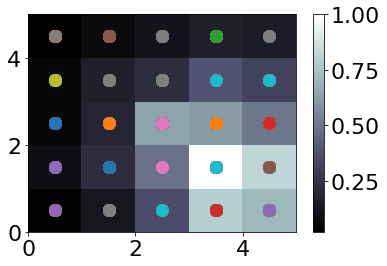

In [140]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# plot(0.5,0.5,'o')
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
show()
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)

In [141]:
count_list = []
c = 0
for i in range(matrix_size):
    for j in range(matrix_size):
        c += 1
        count_list.append(len(Matrix[i][j]))
        print(len(Matrix[i][j]), c)
        for ele in Matrix[i][j]:
            df_5km.loc[df_5km.修正電號==ele,'cluster_num'] = c

143 1
51 2
286 3
1488 4
665 5
82 6
77 7
228 8
485 9
100 10
98 11
83 12
33 13
244 14
64 15
59 16
39 17
38 18
62 19
162 20
54 21
57 22
79 23
27 24
5 25


In [142]:
for c in range(1,matrix_size**2+1,1):
    df_out[f"5km_total_chara_cluster{c}"] = df_5km.loc[df_5km.cluster_num == c,"修正電號"].values

In [143]:
df_5km.groupby(['cluster_num']).mean().loc[:,['mean','sum']]

,mean,sum
cluster_num,,
1.0,21.652643,2866.043706
2.0,40.262419,3637.333333
3.0,17.219765,2333.711538
4.0,6.918095,748.166163
5.0,10.975474,1484.019549
6.0,37.852643,5121.378049
7.0,28.114311,3854.246753
8.0,31.762288,3588.769737
9.0,16.208217,2167.675773


In [144]:
plot_position(df_5km, 16)

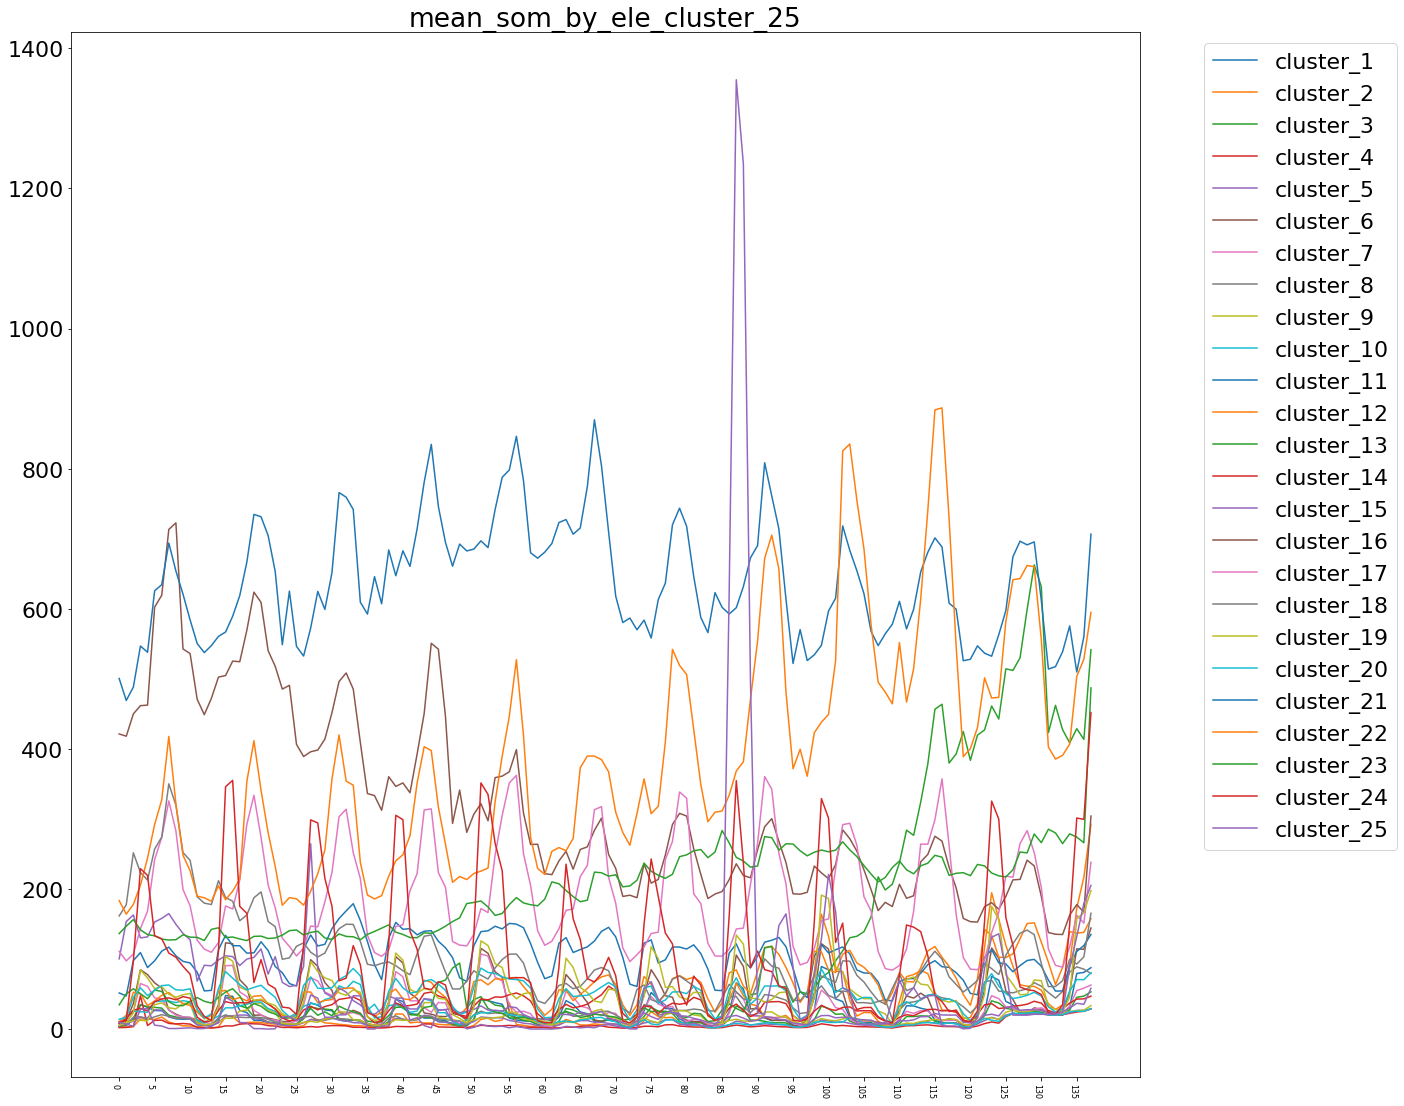

In [145]:
fig = plt.figure(figsize=(20,16))
for i in range(matrix_size**2):
    plt.plot(np.arange(0, 138, 1), df_5km.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{i+1}')
plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'mean_som_by_ele_cluster_{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\線西(4)\line chart'+'\\'+title)

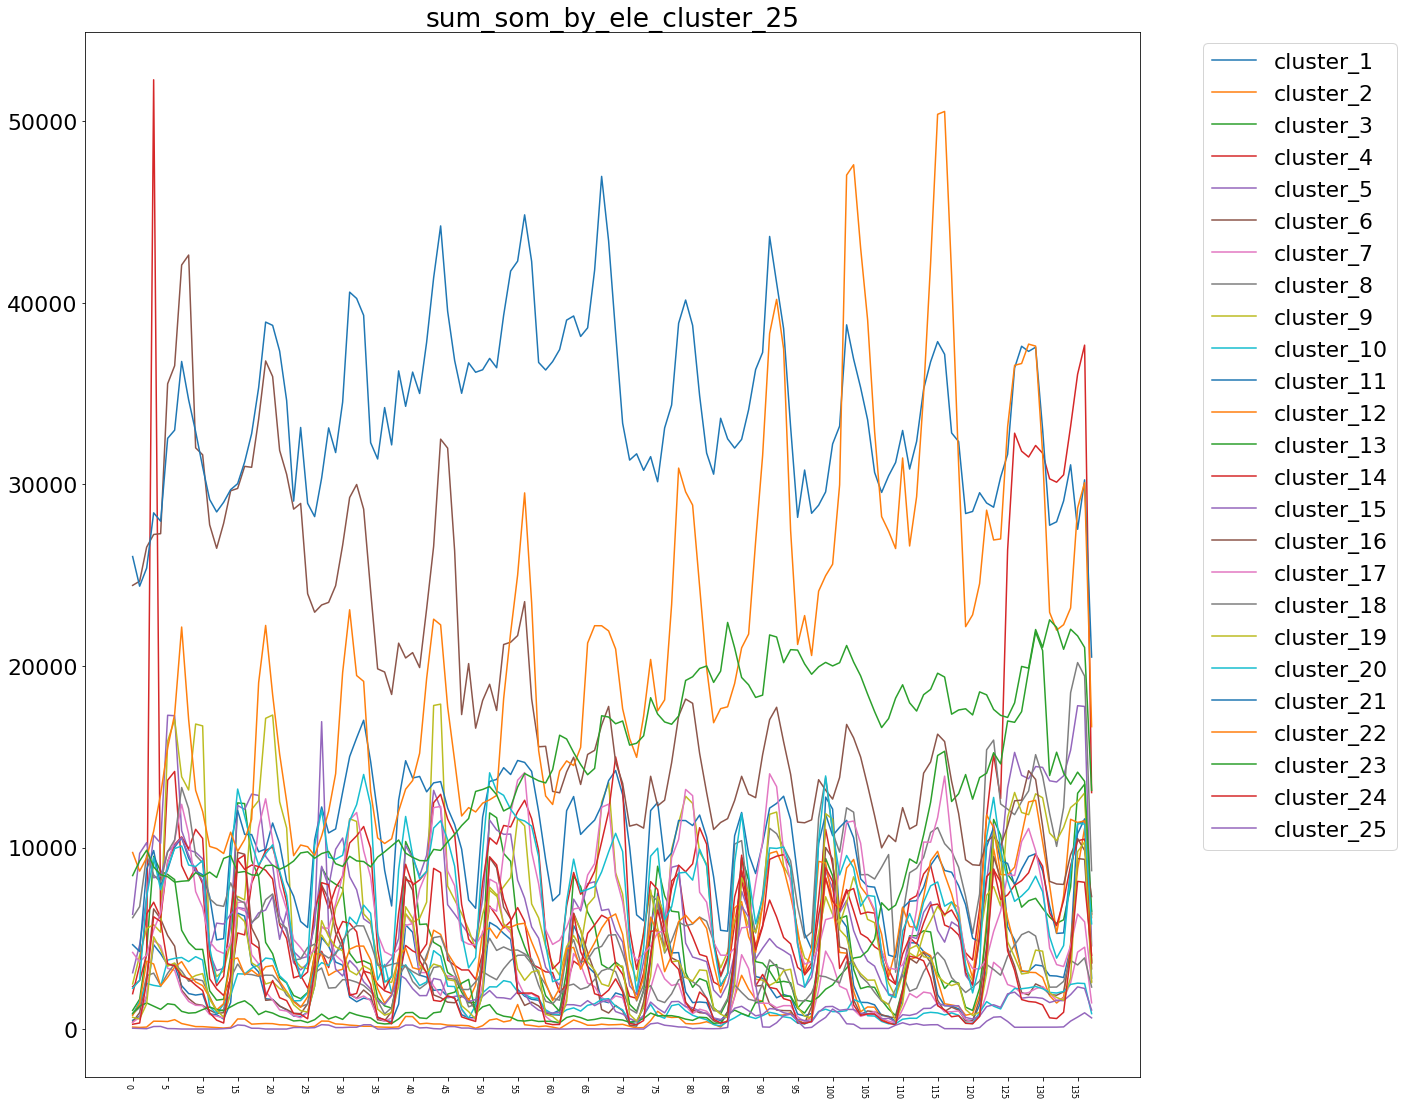

In [146]:
fig = plt.figure(figsize=(20,16))
for i in range(matrix_size**2):
    plt.plot(np.arange(0, 138, 1), df_5km.groupby(['cluster_num']).sum().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{i+1}')
plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'sum_som_by_ele_cluster_{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\線西(4)\line chart'+'\\'+title)

In [147]:
df_pos_info_cluster = pd.DataFrame(columns={"cluster","mean","sum","count"})
df_pos_info_cluster['cluster'] = range(1,matrix_size**2+1,1)
df_pos_info_cluster = df_pos_info_cluster.set_index('cluster')
df_pos_info_cluster['mean'] = df_5km.groupby(['cluster_num']).mean().loc[:,"mean"]
df_pos_info_cluster['sum'] = df_5km.groupby(['cluster_num']).mean().loc[:,"sum"].round(3)
df_pos_info_cluster['count'] = count_list

In [148]:
df_pos_info_cluster

,mean,sum,count
cluster,,,
1,21.652643,2866.044,143
2,40.262419,3637.333,51
3,17.219765,2333.712,286
4,6.918095,748.166,1488
5,10.975474,1484.020,665
6,37.852643,5121.378,82
7,28.114311,3854.247,77
8,31.762288,3588.770,228
9,16.208217,2167.676,485


In [149]:
del df_5km['cluster_num']

## 方向

In [150]:
def addDistanceFeature(well_x,well_y,df):
    df['LENGTH'] = np.sqrt(np.square(well_x-df["TWD97_X"]) + np.square(well_y-df["TWD97_Y"]))
    df['DIRECTION'] = np.arctan2(well_y-df["TWD97_Y"], well_x-df["TWD97_X"])
    # test
    # ix = df[df.DIRECTION<0].index
    # df.loc[ix, "DIRECTION"] += np.pi
    df['COS'] = np.cos(df['DIRECTION'])
    df['SIN'] = np.sin(df['DIRECTION'])

    return df

In [151]:
df_5km_dir = addDistanceFeature(well_x,well_y,df_5km)

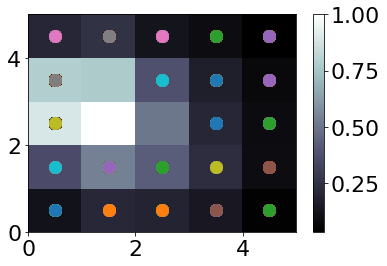

100 1
40 2
565 3
2287 4
353 5
62 6
66 7
0 8
0 9
111 10
85 11
123 12
0 13
88 14
125 15
113 16
46 17
44 18
69 19
62 20
93 21
93 22
68 23
51 24
65 25
total:4709


In [152]:
# X = df_5km_dir.loc[:,["TWD97_X","TWD97_Y","LENGTH"]].values
X = df_5km_dir.loc[:,["DIRECTION","SIN","COS"]].values

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
X[np.isnan(X)] = 0
# import the SOM model
# matrix_size = 4
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 3 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 1000)
y = df_5km_dir.修正電號.values
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# plot(0.5,0.5,'o')
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
show()
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)
count_list = []
c = 0
total_num = 0
for i in range(matrix_size):
    for j in range(matrix_size):
        c += 1
        count_list.append(len(Matrix[i][j]))
        print(len(Matrix[i][j]), c)
        total_num += len(Matrix[i][j])
        for ele in Matrix[i][j]:
            df_5km_dir.loc[df_5km_dir.修正電號==ele,'cluster_num'] = c
print('total:' + str(total_num))

In [153]:
for c in range(1,matrix_size**2+1,1):
    df_out[f"5km_total_dir_cluster{c}"] = df_5km_dir.loc[df_5km_dir.cluster_num == c,"修正電號"].values

In [154]:
df_5km_dir.groupby(['cluster_num']).mean().loc[:,["DIRECTION","SIN","COS"]]

,DIRECTION,SIN,COS
cluster_num,,,
1.0,-1.630403,-0.996959,-0.059502
2.0,-1.330883,-0.967147,0.236623
3.0,-0.076086,-0.055635,0.836347
4.0,1.955567,0.763533,-0.298140
5.0,-2.999511,-0.141198,-0.987061
6.0,-1.837828,-0.964386,-0.263823
7.0,-1.746366,-0.984293,-0.174609
10.0,-2.808668,-0.326629,-0.944569
11.0,-1.930071,-0.935782,-0.351455


In [155]:
plot_position(df_5km_dir, matrix_size**2)

In [156]:
df_5km_dir.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].loc[:,:]

,9601,9602,9603,9604,9605,9606,9607,9608,9609,9610,...,10609,10610,10611,10612,10701,10702,10703,10704,10705,10706
cluster_num,,,,,,,,,,,,,,,,,,,,,
1.0,49.556180,40.856742,38.401685,50.797753,53.078652,57.351124,60.053371,55.870787,51.348315,45.632022,...,71.017677,89.454545,87.510101,63.489796,63.494898,64.348485,66.131313,88.770202,88.719697,236.833333
2.0,36.201389,39.590278,39.590278,46.909722,46.909722,56.173611,56.201389,52.662162,52.662162,40.729730,...,94.160256,98.407895,98.407895,37.690789,37.743421,40.940789,40.967105,58.980263,59.059211,2.000000
3.0,35.334725,38.740818,47.430007,59.008972,61.078675,80.679434,80.359213,79.477053,75.023637,54.175103,...,78.888095,81.418006,74.841815,58.237946,56.959077,56.915476,71.229762,86.239732,86.727232,169.105023
4.0,25.629238,28.980424,47.469012,71.340947,43.311956,55.931225,61.055319,61.581417,52.750666,52.038947,...,62.350000,64.567619,55.752344,47.407033,42.899341,46.058425,63.115559,64.512806,68.194444,87.923167
5.0,19.057823,16.588384,16.702862,26.382155,26.614478,47.891414,48.978956,47.888889,49.511785,54.062919,...,51.878917,54.292735,50.600427,39.182336,38.381766,34.746439,35.079772,43.572650,43.663818,337.200000
6.0,24.943966,26.788793,26.564655,40.584746,39.881356,40.322034,41.500000,32.271186,30.576271,22.860169,...,39.411290,38.282258,34.661290,30.330645,31.975806,38.782258,39.475806,65.427419,64.540323,491.000000
7.0,13.074074,11.827160,11.827160,31.919753,31.938272,34.903030,34.884848,32.068452,32.068452,22.062500,...,47.873737,51.593434,51.593434,41.063131,41.063131,44.888889,44.888889,69.030303,69.030303,0.000000
10.0,45.906593,48.201087,46.896739,52.793478,52.076087,94.010870,93.630435,99.612903,101.569892,81.274194,...,67.190909,63.309091,60.800000,48.459091,49.204545,48.077273,47.195455,62.745455,62.281818,774.000000
11.0,39.272152,35.035865,35.035865,44.804167,45.804167,61.858333,58.858333,49.427083,49.427083,47.170833,...,60.774510,63.684314,62.272549,45.711765,45.711765,45.294118,47.176471,68.491176,67.079412,440.000000


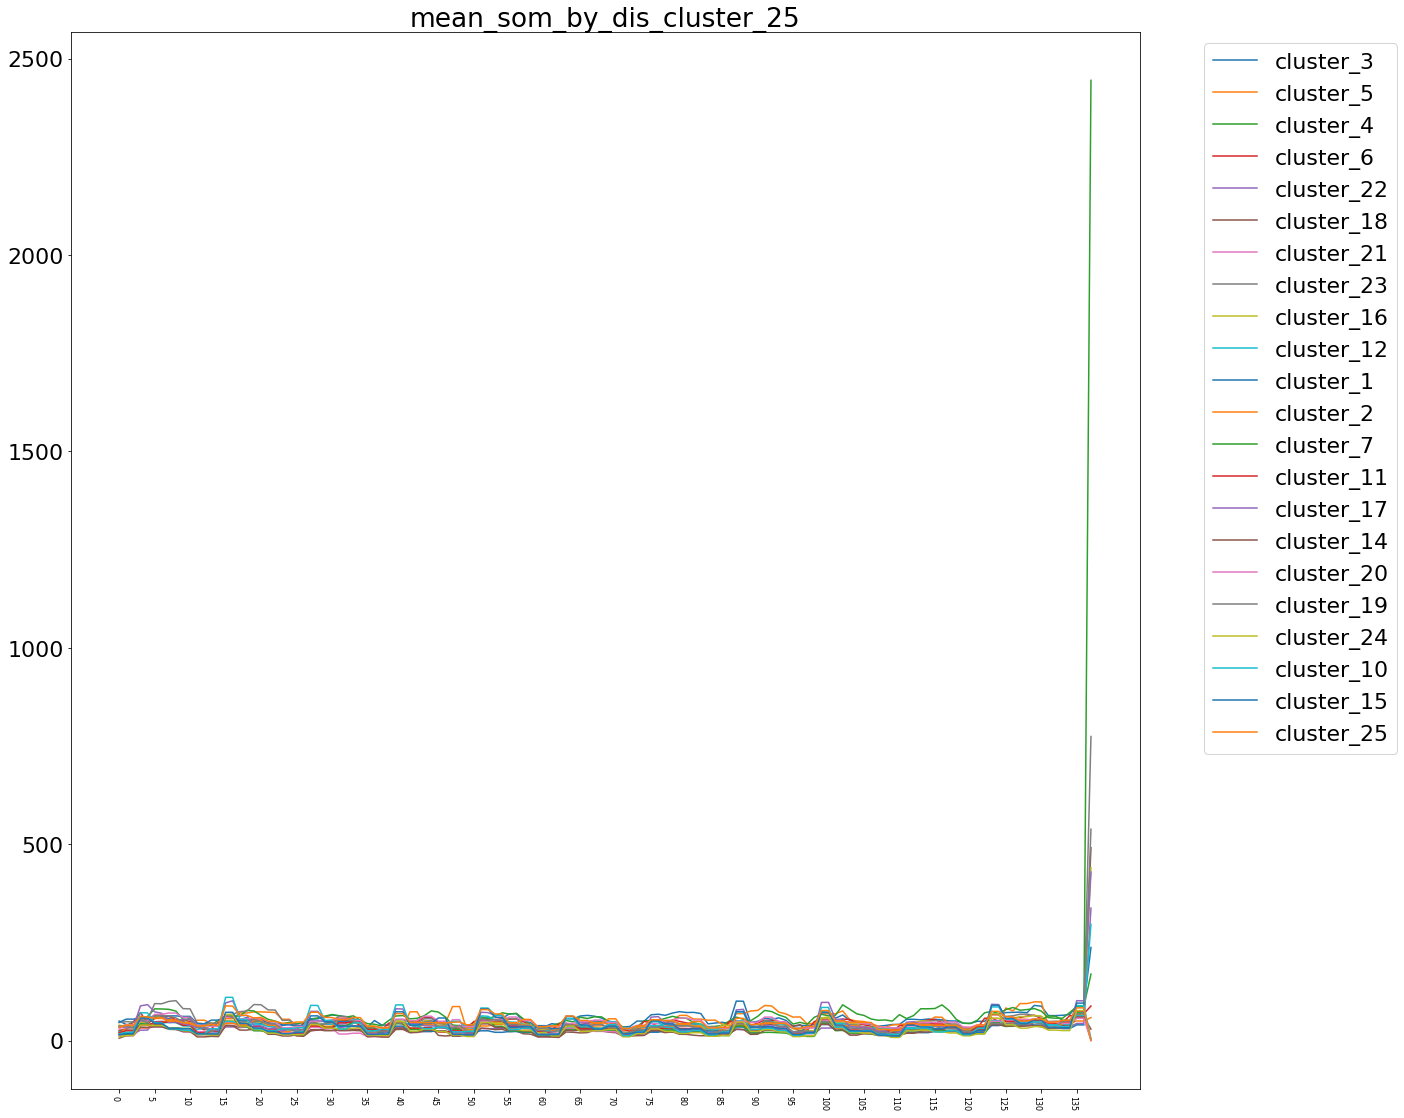

In [157]:
fig = plt.figure(figsize=(20,16))
for i in range(len(df_5km_dir.cluster_num.unique())):
    plt.plot(np.arange(0, 138, 1), df_5km_dir.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{int(df_5km_dir.cluster_num.unique()[i])}')

plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'mean_som_by_dis_cluster_{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\線西(4)\line chart'+'\\'+title)

In [158]:
del df_5km_dir['cluster_num']

## 距離

In [159]:
def som_distance(df_5km_dir):
    # X = df_5km_dir.loc[:,["TWD97_X","TWD97_Y","LENGTH"]].values
    # df_tmp = df_5km_dir.loc[:,"9601":"10706"]
    df_tmp = pd.DataFrame(df_5km_dir.loc[:,"LENGTH"])
    df_tmp["length1"] = df_5km_dir.loc[:,"LENGTH"]
    X = df_tmp.values

    sc = MinMaxScaler(feature_range = (0,1))
    X = sc.fit_transform(X)
    X[np.isnan(X)] = 0
    # import the SOM model
    # matrix_size = 5
    # init the model
    som = MiniSom( x = matrix_size, y = matrix_size, input_len = 2 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
    # init the weight
    som.random_weights_init(X)
    # traing the model
    som.train_random(data = X, num_iteration = 1000)
    y = df_5km_dir.修正電號.values
    # making a self organization map
    from pylab import bone, pcolor, colorbar, plot, show
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    # plot(0.5,0.5,'o')
    for i, x in enumerate(X):
        w = som.winner(x)
        plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
    show()
    w, h = matrix_size, matrix_size
    Matrix = [[[] for x in range(w)] for y in range(h)] 
    for i, x in enumerate(X):
        w = som.winner(x)
        # plt.text(w[0], w[1], y[i], fontsize=12)
        Matrix[w[0]][w[1]].append(y[i])
        
    # sort by weigth
    weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
    for i in range(matrix_size):
        for j in range(matrix_size):
            weight_matrix[i][j] = som._weights[i][j].mean()
    weight_matrix = np.array(weight_matrix)
    count_list = []
    c = 0
    for i in range(matrix_size):
        for j in range(matrix_size):
            c += 1
            count_list.append(len(Matrix[i][j]))
            print(len(Matrix[i][j]), c)
            for ele in Matrix[i][j]:
                df_5km_dir.loc[df_5km_dir.修正電號==ele,'cluster_num'] = c
    
    return df_5km_dir

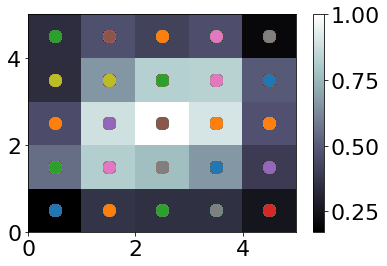

118 1
179 2
103 3
258 4
677 5
134 6
84 7
101 8
174 9
335 10
142 11
105 12
92 13
171 14
101 15
243 16
190 17
100 18
88 19
216 20
400 21
284 22
163 23
162 24
89 25


In [160]:
df_5km_dis = som_distance(df_5km_dir)

In [161]:
for c in range(1,matrix_size**2+1,1):
    df_out[f"5km_total_dis_cluster{c}"] = df_5km_dis.loc[df_5km_dis.cluster_num == c,"修正電號"].values

In [162]:
plot_position(df_5km_dis, matrix_size**2)

In [163]:
df_5km_dis.groupby(['cluster_num']).mean().loc[:,["mean","sum","LENGTH"]]

,mean,sum,LENGTH
cluster_num,,,
1.0,39.202039,4988.627119,3426.053250
2.0,55.858645,7484.312849,2892.845683
3.0,33.365886,4008.701456,2202.648106
4.0,35.905976,4510.334302,1911.646558
5.0,38.700953,5087.756401,1062.666188
6.0,49.237764,6581.416045,3703.457122
7.0,48.418279,6271.699405,3307.786005
8.0,24.630144,2976.272277,2396.812832
9.0,38.882983,5068.636015,2080.205451


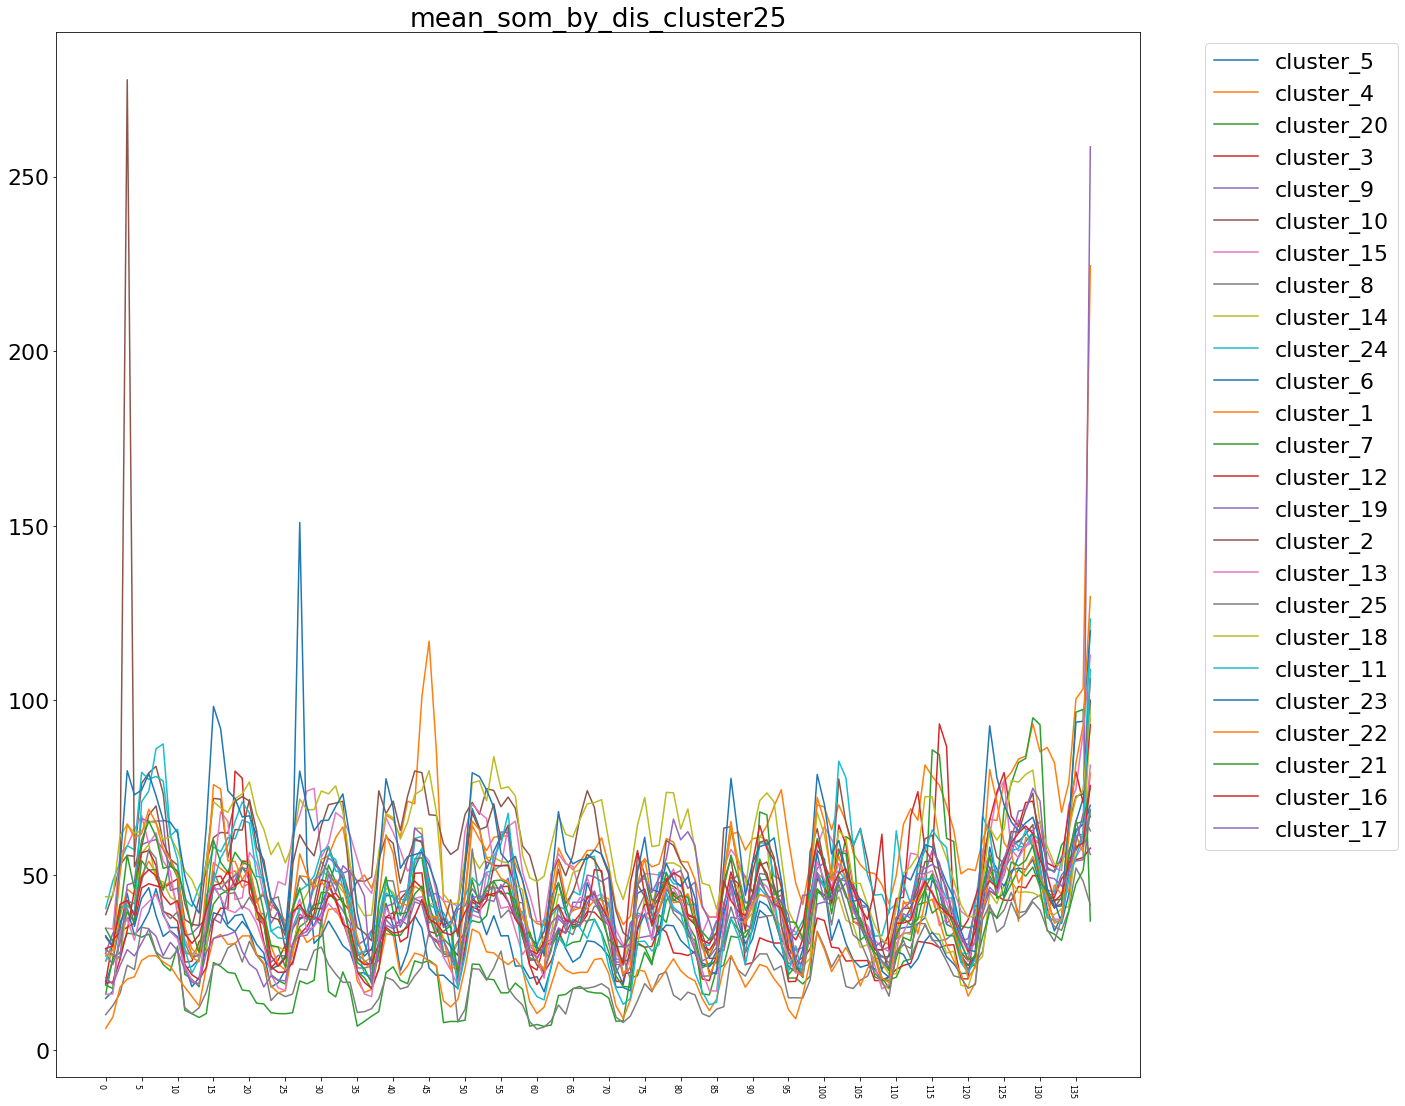

In [164]:
fig = plt.figure(figsize=(20,16))
for i in range(len(df_5km_dis.cluster_num.unique())):
    plt.plot(np.arange(0, 138, 1), df_5km_dis.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{int(df_5km_dis.cluster_num.unique()[i])}')

plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'mean_som_by_dis_cluster{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\線西(4)\line chart'+'\\'+title)

In [165]:
del df_5km_dis['cluster_num']

# 整理電號匯出

In [166]:
for i, v in enumerate(df_out):
    print(i, v, len(df_out[v]))
    # print(df_out[v])
    # break

0 5km_total_chara_cluster1 143
1 5km_total_chara_cluster2 51
2 5km_total_chara_cluster3 286
3 5km_total_chara_cluster4 1488
4 5km_total_chara_cluster5 665
5 5km_total_chara_cluster6 82
6 5km_total_chara_cluster7 77
7 5km_total_chara_cluster8 228
8 5km_total_chara_cluster9 485
9 5km_total_chara_cluster10 100
10 5km_total_chara_cluster11 98
11 5km_total_chara_cluster12 83
12 5km_total_chara_cluster13 33
13 5km_total_chara_cluster14 244
14 5km_total_chara_cluster15 64
15 5km_total_chara_cluster16 59
16 5km_total_chara_cluster17 39
17 5km_total_chara_cluster18 38
18 5km_total_chara_cluster19 62
19 5km_total_chara_cluster20 162
20 5km_total_chara_cluster21 54
21 5km_total_chara_cluster22 57
22 5km_total_chara_cluster23 79
23 5km_total_chara_cluster24 27
24 5km_total_chara_cluster25 5
25 5km_total_dir_cluster1 100
26 5km_total_dir_cluster2 40
27 5km_total_dir_cluster3 565
28 5km_total_dir_cluster4 2287
29 5km_total_dir_cluster5 353
30 5km_total_dir_cluster6 62
31 5km_total_dir_cluster7 66
32

In [167]:
# Save
np.save(r'D:\JunShen\dataset\dataAfterProcess\somFeature\線西(4)\som_ele_dict_'+f'{matrix_size**2}.npy', df_out)

In [168]:
# np.save(r'D:\JunShen\dataset\dataAfterProcess\somFeature\線西(4)\5km_ele_dict.npy', all_ele_dict)